# TODAY!
# <small>basic tools for NLP</small>

It's incredible that a sentence is ever understood. Mere sounds strung together by some agent attempting to mean some thing, but the meaning need not and does not confine itself to that intention. Those sounds, strung as they are in their peculiar and particular order, never change, but do nothing but change. Even if grammatical recognitions are crude, meaning is present. Even if the words are utterly confusing, there is meaning. Even if the semantic relationships are only general or categorical. Even if the language is unknown. Meaning is internal, external, orbital, but still there is no such thing as propositional content. Language never really effaces its own presence, but creates the illusion that it does in cases where meaning presumes a first priority.
 - "Erasure: A Novel" by Percival Everett

"A metaphor cannot be paraphrased"
  - "Erasure: A Novel" by Percival Everett


# $ \\ $

<div>
<img src="Venn_NLPBasics.png" width="800px"/>
</div>



# $ \\ $

## 1 - Text processing
 - ### Strings in Python
 - ### Units of text for modeling
 - ### Working with file types

# $ \\ $

## 2 - A primer to regular expressions
 - ### Basic syntax intro
 - ### Text searching, splitting, cleaning, ...

# $ \\ $

## 3 - NLP via counting
 - ### Counting words
 - ### Document Term Matrix - BOW
 - ### TFIDF

# $ \\ $
# $ \\ $
# $ \\ $

# $ \\ $
# $ \\ $
# $ \\ $

# 1. Text processing

In [1]:
%matplotlib inline

<div>
<img src="Tweet.png" width="400px"/>
</div>

# $ \\ $
# $ \\ $
# $ \\ $

## Wrangling strings in Python

- Strings in Python get wrapped with quotes
- `print` shows visualization

In [2]:
my_string = 'Good morning everyone!'
print(my_string)

Good morning everyone!


In [3]:
print('We can use newlines.\nAnd then we can have tabs\n\tPoint 1\n\tPoint 2')

We can use newlines.
And then we can have tabs
	Point 1
	Point 2


In [4]:
print('We can escape Georg\'s quotes.')

We can escape Georg's quotes.


In [5]:
print("""
Another way to formate crazy
sentence
""".strip())

Another way to formate crazy
sentence


In [6]:
print('  whitespace can be trimmed\n\n \n'.strip())

whitespace can be trimmed


# $ \\ $
# $ \\ $
# $ \\ $

## Introduce some NLP notation: Parts of a string

### Corpus
- Collections of documents for analysis in a problem. Eg. Last year's financial filings of all S&P 500 companies

### Document
- A document is usually the unit of analysis in a model. It could be a tweet or a 10-K filing. It can also have meta data such as date associated with it

### Sentence
- Loose concept that is sometimes useful (model usually need limited input). Could be defined by `.`, `?` or `;`?
- Usually needs a model since ambiguities exist: `Mr. Smith`

### Word / Token
- Words can be compound like 'high-tech' or 'New York'.
- To avoid confusion we usually use `tokens` which could be 'high-tech' or 'high', '-', 'tech'

### Character
- Python treats a single length string (`len(c) == 1`) as a charcter, such as 'a' or '8' or '😊'

# $ \\ $
# $ \\ $
## At different times in this course we will used different units of analysis
- ### analyze sentiment of documents
- ### classify sentences
- ### find words of interest
- ### ...

# $ \\ $
# $ \\ $
# $ \\ $

### Strings - an immutable iterable of characters

In [7]:
# characters within strings can be access directly
print('this is cool'[8:12])

cool


In [8]:
print('this is cool'[-4:])

cool


In [9]:
my_string = 'this is cool'
my_string[3] = 'F'

TypeError: 'str' object does not support item assignment

# $ \\ $
# $ \\ $

### String operations

#### `upper` and `lower`

In [ ]:
print('make this string uppercase'.upper())

MAKE THIS STRING UPPERCASE


In [ ]:
print('THIS IS UPPER'.lower())

this is upper


#### `count`

In [ ]:
# we can count how often a substring occurs
print('the itsy bitsy spider climbed up the waterspout then'.count('the'))

3


#### `+`

In [ ]:
print('we can also' + ' ' + 'add strings')

we can also add strings


#### `join`

In [ ]:
my_list = ['storing strings', 'is', 'fun']
print(my_list)

['storing strings', 'is', 'fun']


In [ ]:
print('--'.join(my_list))

storing strings--is--fun


#### `split`

In [ ]:
print('these are multiple words\n second sentence'.split())

['these', 'are', 'multiple', 'words', 'second', 'sentence']


# $ \\ $
# $ \\ $
# $ \\ $

## String encodings

### ASCII
- This is the basic standard of English text since 1963. It's what you are used to `a-z`, `A-Z`, `0-9`, `.,/;` and more
- can be represented everywhere, causes fewest issues. Often used in models to avoid dimensionality explosion.

$ \\ $

<div>
<img src="LetterDist.png" width="350px"/>
</div>

### Unicode
- Expanded character set to handle international languages.
- Multiple standards, but most common is UTF-8 (default in Python 3)
- From Wikipedia: "UTF-8 is the dominant encoding for the World Wide Web and other Internet technologies, accounting for 98.3% of all web pages, 99.1% of the top 100,000 pages, and up to 100% for many languages, as of 2024.[9] Virtually all countries and languages have 95% or more use of UTF-8 encodings on the web."

In [ ]:
print('😊')

😊


In [ ]:
byte_str = b'\xf0\x9f\x98\x8a'
print(byte_str.decode('utf-8'))

😊


In [ ]:
'😊'[0]

'😊'

# $ \\ $
# $ \\ $

### Unicode can be "annoying" for basic tasks

### Simplify via 'transliterate' / 'unidecode'

In [ ]:
# !pip install unidecode
from unidecode import unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.1 MB/s eta 0:00:00


In [ ]:
print(unidecode('Nestlé S.A.'))

Nestle S.A.


In [ ]:
print(unidecode('😊'))

In [ ]:
:)

SyntaxError: unmatched ')' (<ipython-input-8-3292214a5795>, line 1)

### When should we do this?

# $ \\ $
# $ \\ $
# $ \\ $

## How to read/write local files

### `txt` is useful for raw text, usually with newline (`\n`), or double newline (`\n\n`) separated documents

In [ ]:
with open('sample_text.txt', 'w') as f:
    f.write("Sally sells sea shells on the sea shore.\nTom does not.\n\nThe new iPhone has 6 cameras.\nAnalysts are ecstatic.")


In [ ]:
with open('sample_text.txt', 'r') as f:
    corpus = f.read()
print(corpus)

Sally sells sea shells on the sea shore.
Tom does not.

The new iPhone has 6 cameras.
Analysts are ecstatic.


In [ ]:
!head -n 3 sample_text.txt

Sally sells sea shells on the sea shore.
Tom does not.



In [ ]:
all_items = []
for doc in corpus.split('\n\n'):
    sentences = doc.split('\n')
    all_items.append(sentences)
all_items

[['Sally sells sea shells on the sea shore.', 'Tom does not.'],
 ['The new iPhone has 6 cameras.', 'Analysts are ecstatic.']]

### text files usually don't come with an encoding

In [ ]:
with open('sample_text_utf8.txt', encoding='ascii') as f:
    corpus = f.read()

FileNotFoundError: [Errno 2] No such file or directory: 'sample_text_utf8.txt'

In [ ]:
with open('sample_text_utf8.txt', encoding='utf8') as f:
    corpus = f.read()
print(corpus)

Try to load me! 💣


### `json` is a more structured format that can be used to easily store meta-data for each entry

In [ ]:
with open('sample_text.json') as f:
    doc = f.read()
print(doc)

{"text": "Sally does not like Tom because he is lazy.", "source": "Sally's diary"}


In [ ]:
import json
with open('sample_text.json') as f:
    doc = json.load(f)
print(doc['text'])

Sally does not like Tom because he is lazy.


In [ ]:
doc

{'text': 'Sally does not like Tom because he is lazy.',
 'source': "Sally's diary"}

# $ \\ $
# $ \\ $
# $ \\ $

## Our first corpus: Russell 1k wikipedia intro text

In [ ]:
!head -2 kdwd_r1k_articles.csv

### let's load this data into python using pandas

## Pandas in NLP: text + metadata (`csv`)
$ \\ $
<div>
<img src="Pandas.png" width="350px"/>
</div>

- Files with CSV (comma separated values) are very convenient for short text + metadata
- Pandas is a great utility in your toolbox
    - amazing for numpy style manipulation

In [ ]:
import pandas as pd
wiki_df = pd.read_csv('kdwd_r1k_articles.csv')
wiki_df.head(2)

,page_id,page_title,page_views,intro_text
0,856,Apple Inc.,190485,Apple Inc. is an American multinational techno...
1,2386,American Airlines,40829,"American Airlines, Inc. (AA) is a major Americ..."


### supports basic text manipulations

In [ ]:
wiki_df['intro_text'].str[0].head()

0    A
1    A
2    A
3    A
4    C
Name: intro_text, dtype: object

In [ ]:
wiki_df['intro_text'].str.split().head()

0    [Apple, Inc., is, an, American, multinational,...
1    [American, Airlines,, Inc., (AA), is, a, major...
2    [Advanced, Micro, Devices,, Inc., (AMD), is, a...
3    [An, anthem, is, a, musical, composition, of, ...
4    [Coca-Cola,, or, Coke,, is, a, carbonated, sof...
Name: intro_text, dtype: object

In [ ]:
wiki_df['intro_text'].str.split().str[0].head()

0         Apple
1      American
2      Advanced
3            An
4    Coca-Cola,
Name: intro_text, dtype: object

Pandas is designed for financial time-series data, and it **Excels** at manipulating them

In [ ]:
import pandas as pd
sp500_prices = pd.read_csv("sp500_prices.csv", index_col="Date")
sp500_prices.index = pd.to_datetime(sp500_prices.index)
sp500_prices


FileNotFoundError: [Errno 2] No such file or directory: 'sp500_prices.csv'

Plot prices, daily returns, and exponentially-weighted moving average of returns, all in one go!

In [ ]:
sp500_prices['AMD'].plot(figsize=(28,7), title="Daily Prices On AMD"); plt.show();
sp500_prices['AMD'].diff().plot(figsize=(28,7),title='Daily Return on AMD'); plt.show();
sp500_prices['AMD'].diff().ewm(com=21).mean().plot(figsize=(28,7),title='Monthly EWMA of Returns on AMD'); plt.show();

In [ ]:
sp500_prices[['AAPL','MSFT']].plot(logy=True, figsize=(28,7), title='Daily prices: Apple and Microsoft').plot; plt.show();
sp500_prices['MSFT'].diff().ewm(com=21*6, min_periods=42).corr(sp500_prices['AAPL'].diff()).plot(figsize=(28,7), title='6-Month Exp Wt Correlation MSFT and AAPL');

### X) Optional Reading on Pandas

- [5 minutes] https://towardsdatascience.com/in-depth-pandas-tutorial-5d896483ba8a
- [5 hours] https://www.amazon.com/gp/product/1491957662/ref=as_li_tl
- [forever] https://pandas.pydata.org/docs/

# $ \\ $
# $ \\ $
# $ \\ $

## How to read remote files
- There are many places to grab remote text from: Databases, S3 bucket, python packages, ...

### Requests for general web pages

In [ ]:
!pip install requests

In [ ]:
import requests

res = requests.get("https://en.wikipedia.org/wiki/SpaceX_Dragon")

In [ ]:
res

<Response [200]>

In [ ]:
res.text[:1000]

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>SpaceX Dragon - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vect

### Pandas for tables

In [ ]:
import pandas as pd
dfs = pd.read_html("https://en.wikipedia.org/wiki/List_of_Android_smartphones")

In [ ]:
len(dfs)

34

In [ ]:
dfs[3].head()

,0,1
0,NaN,It has been suggested that this article should...


### Toy datasets from sklearn

In [ ]:
from sklearn.datasets import fetch_california_housing
calif_dataset = fetch_california_housing()
print(calif_dataset['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
print(boston_dataset['DESCR'])

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
print(calif_dataset.data.shape)
calif_dataset.data

(20640, 8)


array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

# $ \\ $
# $ \\ $
# $ \\ $

### More advanced Datasets (fashion image classification)

In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


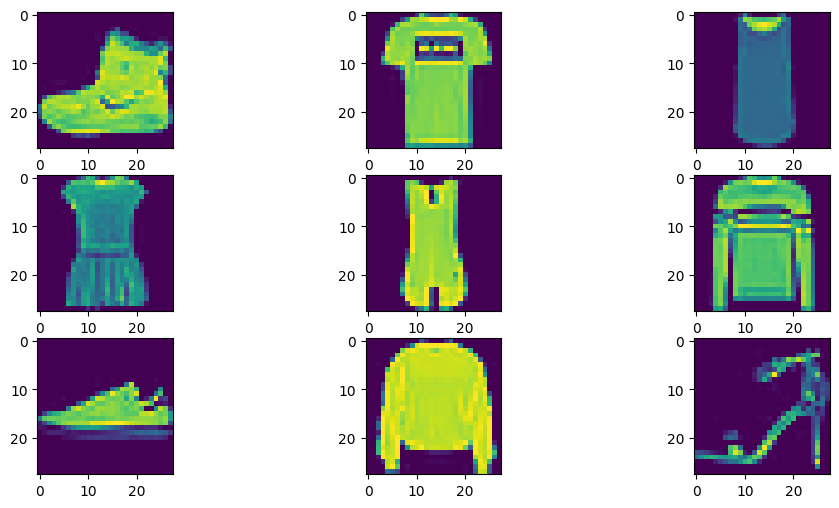

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
for n in range(9):
    plt.subplot(3,3, n + 1)
    plt.imshow(x_train[n])

# $ \\ $
# $ \\ $
# $ \\ $
# $ \\ $
# $ \\ $
# $ \\ $

# 2. A primer on regular expressions (Regex)

> User: I am unhappy.<br />
<span style="color:blue">ELIZA: DO YOU THINK COMING HERE WILL HELP YOU NOT TO BE UNHAPPY</span><br />
User:  I need some help, that much seems certain.<br />
<span style="color:blue">ELIZA: WHAT WOULD IT MEAN TO YOU IF YOU GOT SOME HELP</span><br />
User:  Perhaps I could learn to get along with my mother.<br />
<span style="color:blue">ELIZA: TELL ME MORE ABOUT YOUR FAMILY</span><br />
User:  My mother takes care of me.<br />
<span style="color:blue">ELIZA: WHO ELSE IN YOU FAMILY TAKES CARE OF YOU</span><br />
User:  My father.<br />
<span style="color:blue">ELIZA: YOUR FATHER</span><br />
User:  You are like my father in some ways.
                                    
                                    - Weizenbaum (MIT, 1966)

### How does this work? (in 1966)

# $ \\ $
# $ \\ $
# $ \\ $

####  Regexes are sequences of characters expressing a search pattern
#### <span style="color:orange">!Regexes are an important part of modern NLP pipelines!</span>
### What can this do? Eg:
- find the string 'iphone'
- only if preceeded by 'apple released the new' or 'apple announced the new'
- exclude 'iphone 6'
- containing spaces but no newlines
- apple can be misspelled aple

`r'app?le (?:release|announced) the new (iphone) [^6]'`

### But also:
- find 'garbage' text within a document
- containing at least two or more consecutive `-` or `*`
- or fewer than 3 characters

`r'^.*[\-\*]{2,}.*$|^.*{,2}$'`

### This is extremely powerful to do preprocessing, create strong features and even build baseline models.

# $ \\ $
# $ \\ $
# $ \\ $

## Basic patterns

In [5]:
import re

### strings can be matched

In [6]:
re.findall(r'iphone', 'i own an iphone i think')

['iphone']

### period matches any single character

In [7]:
re.findall(r'i.hone', 'i own an iXhone i think')

['iXhone']

### questionmark means optional

In [8]:
re.findall(r'ipw?hone', 'i own an iphone i think')

['iphone']

### brackets [ ] specify alternatives and allow ranges, eg 0-9 or a-z

In [ ]:
re.findall(r'iphone [6x]', 'i know the iphone 6 and the iphone x but not the iphone 9')

['iphone 6', 'iphone x']

In [ ]:
re.findall(r'iphone [0-9a-z]', 'i know the iphone 6 and the iphone x but not the iphone 9')

['iphone 6', 'iphone x', 'iphone 9']

### pipe | denotes 'or'

In [ ]:
re.findall(r'tuxedo|iphone', 'who want\'s an iphone')

['iphone']

### Whitespace can be matched explicitly as ' ' or via \s

In [ ]:
re.findall(r' ', 'two words')

[' ']

In [ ]:
re.findall(r'\s', 'two words')

[' ']

In [ ]:
re.findall(r'\s', 'two\nwords')

['\n']

### Word boundaries can be specified via \b (doesn't actually match a character)

In [ ]:
re.findall(r'\bspace\b', 'spaceteam')

[]

In [ ]:
re.findall(r'\bspace\b', 'space team')

['space']

In [ ]:
re.findall(r'\bspace\b', 'space-team')

['space']

### quantifier *

In [ ]:
# occurs 0 to infinite
re.findall(r'0*7', 'who is 007?')

['007']

In [ ]:
# occurs 0 to infinite
re.findall(r'8*7', 'who is 007?')

['7']

### quantifier +

In [ ]:
# occurs 1 to infinite
re.findall(r'0+7', 'who is 7?')

[]

In [ ]:
# occurs 1 to infinite
re.findall(r'00+7', 'who is 007?')

['007']

### Characters can be escaped

In [ ]:
re.findall(r'\.', 'how much is 3.4?')

['.']

# $ \\ $
# $ \\ $
# $ \\ $

## --- (optional) - a few more concepts ---

### quantifier {}

In [ ]:
# occurs specified times
re.findall(r'0{2}7', 'who is 07 or 0007?')

['007']

In [ ]:
# occurs from-to times
re.findall(r'0{1,2}7', 'who is 07 or 007?')

['07', '007']

In [ ]:
# single-ended
re.findall(r'0{,2}7', 'who is 07 or 007?')

['07', '007']

### Regex is case-sensitive unless you don't want it to be

In [ ]:
re.findall(r'iphone', 'Apple sells iPhones')

[]

In [ ]:
re.findall(r'iPhone', 'Apple sells iPhones')

['iPhone']

In [ ]:
re.findall(r'iphone', 'Apple sells iPhones', flags=re.IGNORECASE)

['iPhone']

### matching occurs greedily

In [ ]:
re.findall(r'priceline|price', 'priceline is a travel agency company')

['priceline']

In [ ]:
re.findall(r'price|priceline', 'priceline is a travel agency company')

['price']

### `re.search` for finding a match object

In [ ]:
re.search(r'du*k', 'donald duck is cool')

In [ ]:
m = re.search(r'du.k', 'donald duck is cool')
m

<re.Match object; span=(7, 11), match='duck'>

### the match object

In [ ]:
print(m.group(0))
print(m.start(), m.end())

duck
7 11


### (Capture) Groups using parentheses

In [ ]:
m = re.search(r'an (iphone) at', 'donald duck has an iphone at home')
m.group(1)

'iphone'

In [ ]:
m = re.search(r'an (?:iphone) at', 'donald duck has an iphone at home')
m.group(1)

IndexError: no such group

### `^ and $` to match beginning/end

In [ ]:
re.search(r'^d.ck$', 'donald duck')

In [ ]:
re.search(r'^d.ck$', 'duck')

<re.Match object; span=(0, 4), match='duck'>

In [ ]:
re.match(r'd.ck', 'duck')

<re.Match object; span=(0, 4), match='duck'>

### `^` within brackets means negation

In [ ]:
re.search(r'd[^a]nald', 'donald duck')

<re.Match object; span=(0, 6), match='donald'>

### `re.finditer` to get multiple match groups as generator (most useful)

In [ ]:
for m in re.finditer(r'iphone .', 'apple produces the iphone 8 and the iphone x.'):
    print('found match starting at:', m.start())

found match starting at: 19
found match starting at: 36


### `re.split` for splitting text based on characters

In [ ]:
re.split(r'\s+', 'i like freeze-dried strawberries')

['i', 'like', 'freeze-dried', 'strawberries']

In [ ]:
re.split(r'\s+|\-', 'i like freeze-dried strawberries')

['i', 'like', 'freeze', 'dried', 'strawberries']

## --- (end optional) ---

# $ \\ $
# $ \\ $
# $ \\ $

### Let's do some extracting

In [ ]:
wiki_df = pd.read_csv('kdwd_r1k_articles.csv')
wiki_df.head(2)

NameError: name 'pd' is not defined

#### Let's look find hyphenated corporation names

In [ ]:
regex_ptn = r'[a-zA-Z]+\-[a-zA-Z]+'
for _, row in wiki_df.iterrows():
    m = re.search(regex_ptn, row['page_title'])
    if m:
        print(m.group())

Coca-Cola
Curtiss-Wright
Take-Two
Bristol-Myers
Freeport-McMoRan
E-Trade
Snap-on
Sherwin-Williams
Bio-Rad
Knight-Swift
Banc-Corp
Miracle-Gro
T-Mobile
Ingersoll-Rand
Bio-Techne
Mid-America


#### Find M&A activity

In [9]:
regex_ptn = r'was acquired by|purchased'
for _, row in wiki_df.iterrows():
    m = re.search(regex_ptn, row['intro_text'])
    if m:
        print(f'{row["page_title"]:30s}\t\t\t{row["intro_text"][m.start()-20:m.end()+20]}')

NameError: name 'wiki_df' is not defined

#### Count occurences of years

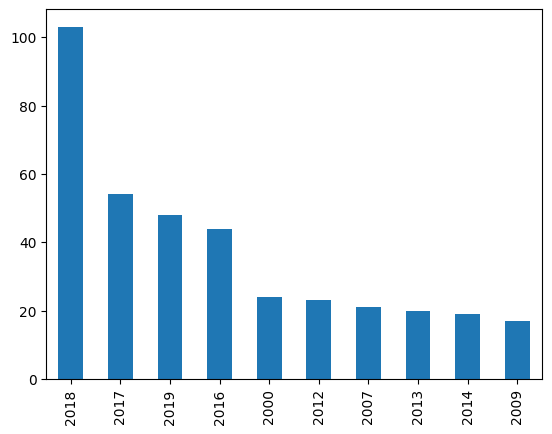

In [ ]:
regex_ptn = r'\b20[012][0-9]\b'
all_matches = []
for _, row in wiki_df.iterrows():
    m = re.search(regex_ptn, row['intro_text'])
    if m:
        all_matches.append(m.group())
pd.Series(all_matches).value_counts().head(10).plot.bar();

# $ \\ $
# $ \\ $
# $ \\ $

## ➡️ Exercise: https://regex101.com/

https://yhoo.it/3zo5FEP

- currencies (numbers)
- all quotations
- ...

# $ \\ $
# $ \\ $
# $ \\ $

### Understanding ELIZA

>User: Men are all alike.<br />
<span style="color:blue">ELIZA: IN WHAT WAY</span><br />
User: They’re always bugging us about something or other.<br />
<span style="color:blue">ELIZA: CAN YOU THINK OF A SPECIFIC EXAMPLE</span><br />
User: Well, my boyfriend made me come here.<br />
<span style="color:blue">ELIZA: YOUR BOYFRIEND MADE YOU COME HERE</span><br />
User: He says I’m depressed much of the time.<br />
<span style="color:blue">ELIZA: I AM SORRY TO HEAR YOU ARE DEPRESSED</span><br />

- change all instances of MY to YOUR, and I’M to YOU ARE, etc.
- define patterns for substitutions. Eg:
 - `r'.* I\'m (depressed|sad) .*'` -> `'I AM SORRY TO HEAR YOU ARE'` or `'WHY DO YOU THINK YOU ARE'`
 - `r'.* always .*'` -> `'CAN YOU THINK OF A SPECIFIC EXAMPLE'`

# $ \\ $
# $ \\ $
# $ \\ $

# $ \\ $
# $ \\ $
# $ \\ $

# $ \\ $
# $ \\ $
# $ \\ $

# 3. NLP basics

In [ ]:
import pandas as pd

In [12]:
wiki_df = pd.read_csv('kdwd_r1k_articles.csv')
wiki_df.head(2)

FileNotFoundError: [Errno 2] No such file or directory: 'kdwd_r1k_articles.csv'

In [ ]:
wiki_df.shape

(761, 4)

### Let's count some words

In [10]:
all_words = []
for _, row in wiki_df.iterrows():
    all_words.extend(re.findall(r'[a-z]+', row['intro_text'].lower()))

NameError: name 'wiki_df' is not defined

In [11]:
len(all_words)

0

In [ ]:
all_words[:10]

['apple',
 'inc',
 'is',
 'an',
 'american',
 'multinational',
 'technology',
 'company',
 'headquartered',
 'in']

20 most common tokens


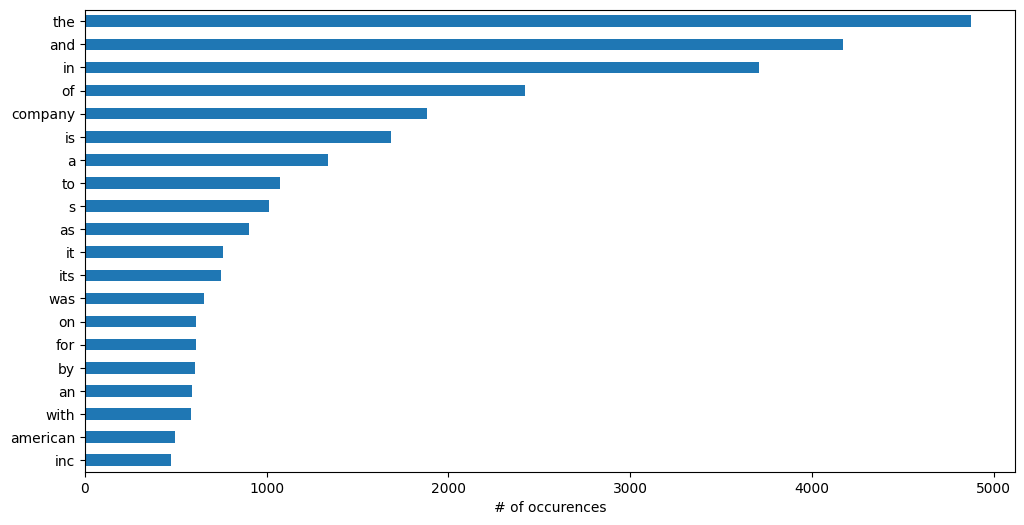

20 least common tokens


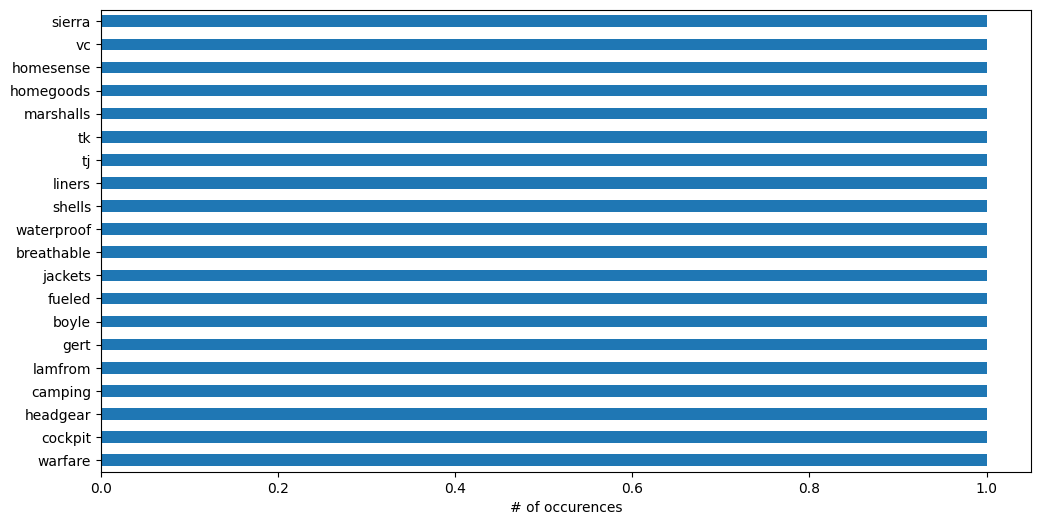

In [ ]:
word_counts = pd.Series(all_words).value_counts()

plt.figure(figsize=(12,6))
print('20 most common tokens')
word_counts.head(20).iloc[::-1].plot.barh()
xlabel('# of occurences')
plt.show();

plt.figure(figsize=(12,6))
print('20 least common tokens')
word_counts.tail(20).iloc[::-1].plot.barh()
xlabel('# of occurences')
plt.show();

## Are common or rare words more useful?

# $ \\ $
# $ \\ $
# $ \\ $

### Many ways to mitigate common words - for example Stop Words

In [ ]:
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
print('10 of the most common words we may want to filter:\n')
print(sorted(list(ENGLISH_STOP_WORDS))[:10])

10 of the most common words we may want to filter:

['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost']


# $ \\ $
# $ \\ $
# $ \\ $

### Note: What we are essentially doing is "feature engineering" by using common sense priors from our understanding of language and the world in general.

# $ \\ $
# $ \\ $
# $ \\ $

### What else are we missing?

# $ \\ $
# $ \\ $
# $ \\ $

# $ \\ $
# $ \\ $
# $ \\ $

In [ ]:
print(word_counts['do'])
print(word_counts['doing'])

10
10


# $ \\ $
# $ \\ $

### Stemming - Truncate to root!

In [ ]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

In [ ]:
print(stemmer.stem('do'))
print(stemmer.stem('doing'))

do
do


### But:

In [ ]:
print(stemmer.stem('does'))

doe


In [ ]:
print(stemmer.stem('going'))
print(stemmer.stem('went'))

go
went


### This fails because we are using simple rules for truncating

### Need to find actual word root

## New package NLTK - Wordnet

- #### NLTK - useful toolbox for nlp basics
- #### Wordnet - essentially a 'dictionary' that includes basic word information and structured relationships

In [ ]:
# need to download wordnet dictionary
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.corpus import wordnet

In [ ]:
synset_list = wordnet.synsets("plant")
synset_list

[Synset('plant.n.01'),
 Synset('plant.n.02'),
 Synset('plant.n.03'),
 Synset('plant.n.04'),
 Synset('plant.v.01'),
 Synset('implant.v.01'),
 Synset('establish.v.02'),
 Synset('plant.v.04'),
 Synset('plant.v.05'),
 Synset('plant.v.06')]

### Different interpretations/Synsets have meta data

In [ ]:
[s.definition() for s in synset_list]

['buildings for carrying on industrial labor',
 '(botany) a living organism lacking the power of locomotion',
 'an actor situated in the audience whose acting is rehearsed but seems spontaneous to the audience',
 'something planted secretly for discovery by another',
 'put or set (seeds, seedlings, or plants) into the ground',
 'fix or set securely or deeply',
 'set up or lay the groundwork for',
 'place into a river',
 'place something or someone in a certain position in order to secretly observe or deceive',
 'put firmly in the mind']

In [ ]:
wordnet.synset('plant.n.01').examples()

['they built a large plant to manufacture automobiles']

### Structured information

In [ ]:
wordnet.synset('plant.n.01').hypernyms()

[Synset('building_complex.n.01')]

In [ ]:
wordnet.synset('plant.n.01').hyponyms()

[Synset('bottling_plant.n.01'),
 Synset('brewery.n.01'),
 Synset('distillery.n.01'),
 Synset('factory.n.01'),
 Synset('mint.n.06'),
 Synset('packinghouse.n.02'),
 Synset('recycling_plant.n.01'),
 Synset('refinery.n.01'),
 Synset('saltworks.n.01'),
 Synset('sewage_disposal_plant.n.01'),
 Synset('smelter.n.01')]

In [ ]:
w1 = wordnet.synset('ship.n.01')
w2 = wordnet.synset('boat.n.01')
print(w1.wup_similarity(w2))

0.9090909090909091


## What are some drawbacks?

# $ \\ $
# $ \\ $
# $ \\ $

### Drawbacks
- #### outdated & static
- #### very 'academically correct', sometimes far away from actual language

In [ ]:
wordnet.synset('iphone.n.01')

WordNetError: No lemma 'iphone' with part of speech 'n'

## Use Wordnet to do
## Lemmatizing - find actual word root

In [ ]:
lemmatizer = nltk.stem.WordNetLemmatizer()

In [ ]:
# need to pass part of speech
print(lemmatizer.lemmatize('going', pos='v'))
print(lemmatizer.lemmatize('went', pos='v'))

go
go


### Should we always do this in pre-processing?

# $ \\ $
# $ \\ $
# $ \\ $

## Another important concept: n-grams

- ngrams refer to combining multiple tokens to a new larger token.

### Character n-grams

In [ ]:
# get all 3-grams in a string
n_gram = 3
s = 'iPhone X'
for n in range(len(s)-2):
    print(s[n:n + n_gram])

iPh
Pho
hon
one
ne 
e X


### Word n-grams

In [ ]:
# get all 2-grams in a string
n_gram = 2
s = 'I live in New York'
tokens = s.split()
for n in range(len(tokens)-1):
    print(' '.join(tokens[n:n + n_gram]))

I live
live in
in New
New York


### Great representation of text into 'chunks'.
- #### words have nuclear meaning
- #### 2+grams have more context

### Note that this will explode our vocabulary size

In [ ]:
all_words = set()
for _, row in wiki_df.iterrows():
    for token in re.findall(r'[a-z0-9]+', row['intro_text'].lower()):
        if token not in all_words:
            all_words.add(token)
print(len(all_words), 'unique 1-grams (unigrams) found')

NameError: name 'wiki_df' is not defined

In [ ]:
all_words = set()
for _, row in wiki_df.iterrows():
    tokens = re.findall(r'[a-z0-9]+', row['intro_text'].lower())
    for n in range(len(tokens) - 1):
        all_words.add(tokens[n] + ' ' + tokens[n+1])
print(len(all_words), 'unique 2-grams (bigrams) found')

50390 unique 2-grams (bigrams) found


### 'New York' seems important but 'in New' does not.

## How can we we figure this out?

# $ \\ $
# $ \\ $
# $ \\ $

# $ \\ $
# $ \\ $
# $ \\ $

### -> Combine concepts for our first "feature" representation of documents

# $ \\ $

## Bag of Words (BOW)

- ### Unordered, structured representation of ngrams per document

# $ \\ $

### Document-Term Matrix

In [ ]:
wiki_df.head(2)

,page_id,page_title,page_views,intro_text
0,856,Apple Inc.,190485,Apple Inc. is an American multinational techno...
1,2386,American Airlines,40829,"American Airlines, Inc. (AA) is a major Americ..."



# $ \\ $

<div>
<img src="TDMatrix.png" width="400px"/>
</div>

# $ \\ $

In [ ]:
def get_tokens(text):
    return re.findall(r'[a-z]+', text.lower())

get_tokens(wiki_df.iloc[0]['intro_text'])[:5]

['apple', 'inc', 'is', 'an', 'american']

In [ ]:
# count words
def get_token_counts(text):
    word_count = {}
    for token in get_tokens(text):
        if token not in word_count:
            word_count[token] = 1
        else:
            word_count[token] += 1
    return word_count

pd.Series(get_token_counts(wiki_df.iloc[0]['intro_text'])).sort_values(ascending=False).head(10)

{'apple': 31,
 'inc': 3,
 'is': 7,
 'an': 3,
 'american': 1,
 'multinational': 1,
 'technology': 2,
 'company': 10,
 'headquartered': 1,
 'in': 16,
 'cupertino': 1,
 'california': 1,
 'that': 1,
 'designs': 1,
 'develops': 1,
 'and': 33,
 'sells': 1,
 'consumer': 2,
 'electronics': 2,
 'computer': 6,
 'software': 3,
 'online': 2,
 'services': 3,
 'it': 5,
 'considered': 1,
 'one': 2,
 'of': 11,
 'the': 49,
 'big': 1,
 'four': 1,
 'tech': 1,
 'companies': 3,
 'along': 1,
 'with': 3,
 'amazon': 1,
 'google': 1,
 'facebook': 1,
 's': 13,
 'hardware': 1,
 'products': 4,
 'include': 3,
 'iphone': 2,
 'smartphone': 1,
 'ipad': 1,
 'tablet': 1,
 'mac': 2,
 'personal': 3,
 'ipod': 1,
 'portable': 1,
 'media': 3,
 'player': 3,
 'watch': 1,
 'smartwatch': 1,
 'tv': 2,
 'digital': 1,
 'airpods': 1,
 'wireless': 1,
 'earbuds': 1,
 'homepod': 1,
 'smart': 1,
 'speaker': 1,
 'includes': 1,
 'macos': 1,
 'ios': 2,
 'ipados': 1,
 'watchos': 1,
 'tvos': 1,
 'operating': 2,
 'systems': 1,
 'itunes': 3,


In [ ]:
# do this for all pages using pandas
series_container = []
for _, row in wiki_df.iterrows():
    word_count = get_token_counts(row['intro_text'])
    s = pd.Series(word_count)
    series_container.append(s)

In [ ]:
df = pd.concat(series_container, axis=1).fillna(0).T

In [ ]:
df.head()

,apple,inc,is,an,american,multinational,technology,company,headquartered,in,...,separating,isr,tactical,avionics,terrestrial,spaceborne,specialize,surveillance,weaponry,warfare
0,31.0,3.0,7.0,3.0,1.0,1.0,2.0,10.0,1.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,5.0,2.0,9.0,0.0,0.0,2.0,1.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,2.0,1.0,1.0,1.0,0.0,2.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,3.0,0.0,0.0,0.0,0.0,6.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(761, 9612)

In [ ]:
761 * 9612

7314732

## at fp64 - 8 bytes per float -> 58 Mb for only this tiny test case

In [ ]:
!dir -lah kdwd_r1k_articles.csv

 Volume in drive C is Local Disk
 Volume Serial Number is 083B-71B4

 Directory of C:\Users\ROB6694\OneDrive - Robeco Nederland B.V\Desktop\MikePersonal\MIT_ML_Course\FromMIT\week_03_2023_09_25


 Directory of C:\Users\ROB6694\OneDrive - Robeco Nederland B.V\Desktop\MikePersonal\MIT_ML_Course\FromMIT\week_03_2023_09_25

05/30/2024  07:35 PM           637,383 kdwd_r1k_articles.csv
               1 File(s)        637,383 bytes
               0 Dir(s)  641,015,549,952 bytes free


 ## the whole datafile only has 0.6 Mb

### -> We need a better representation

# $ \\ $
# $ \\ $
# $ \\ $

## In reality mostly 0:

In [ ]:
df.head()

,apple,inc,is,an,american,multinational,technology,company,headquartered,in,...,separating,isr,tactical,avionics,terrestrial,spaceborne,specialize,surveillance,weaponry,warfare
0,31.0,3.0,7.0,3.0,1.0,1.0,2.0,10.0,1.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,5.0,2.0,9.0,0.0,0.0,2.0,1.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,2.0,1.0,1.0,1.0,0.0,2.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,3.0,0.0,0.0,0.0,0.0,6.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df[df<1].count(axis=0)

# $ \\ $

### Using Sparse Matrix representation

In [ ]:
from scipy.sparse import csr_matrix

my_array = np.array(df)
my_sparse_array = csr_matrix(my_array)

C:\Users\ROB6694\AppData\Local\Temp\ipykernel_18492\2566849801.py:4: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  my_sparse_array = csr.csr_matrix(my_array)


In [ ]:
my_sparse_array

<761x9612 sparse matrix of type '<class 'numpy.float64'>'
	with 56762 stored elements in Compressed Sparse Row format>

In [ ]:
import sys
print('size of array (bytes):', sys.getsizeof(my_array))
print('size of sparse array (bytes):', sys.getsizeof(my_sparse_array))

size of array (bytes): 58517976
size of sparse array (bytes): 48


In [ ]:
my_sparse_array[:,0]

<761x1 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [ ]:
sparse_column = my_sparse_array[:,0]
column_array = np.array(sparse_column.todense())[:,0]
column_array[:5]

array([31.,  0.,  0.,  0.,  1.])

# $ \\ $

# $ \\ $

## -> Combine concepts in convenient tools

## Scikit-learn package

- #### basic machine learning in-a-box
- #### tools for data processing as well as modeling -> more next lecture

## `CountVectorizer`
- ### convenient functionality around tokenizing, filtering, ngramming and Sparse Count Matrix

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
count_matrix = vectorizer.fit_transform(wiki_df['intro_text'].tolist());

In [ ]:
count_matrix

<761x10263 sparse matrix of type '<class 'numpy.int64'>'
	with 58990 stored elements in Compressed Sparse Row format>

In [ ]:
pd.Series(vectorizer.vocabulary_).head()

apple       1133
inc         4972
is          5238
an          1042
american    1013
dtype: int64

### 2 lines of code for a great representation of our corpus! (also fast and memory efficient)

### -> basis for many ML models

### Knobs to tune:

In [ ]:
vectorizer = CountVectorizer(

    analyzer='word',
    token_pattern=r'\b[^\s][^\s]+\b',

    lowercase=True,
    stop_words=None,

    ngram_range=(1, 2),  # n-grams

    min_df=3,  # minimum occurence
    max_df=1.0,  # max occurence

)
count_matrix = vectorizer.fit_transform(wiki_df['intro_text'].tolist());

In [ ]:
print(count_matrix.shape)

(761, 6651)


In [ ]:
count_matrix.nonzero()

(array([  0,   0,   0, ..., 760, 760, 760]),
 array([ 913, 3219, 3432, ..., 2581,  896, 5748]))

In [ ]:
print(len(count_matrix.nonzero()[0]))

82626


In [ ]:
print(len(vectorizer.vocabulary_))
vocab = list(pd.Series(vectorizer.vocabulary_).sort_values().index)
vocab[:5]

6651


['1,000', '1.1', '1.3', '1.3 million', '1.5']

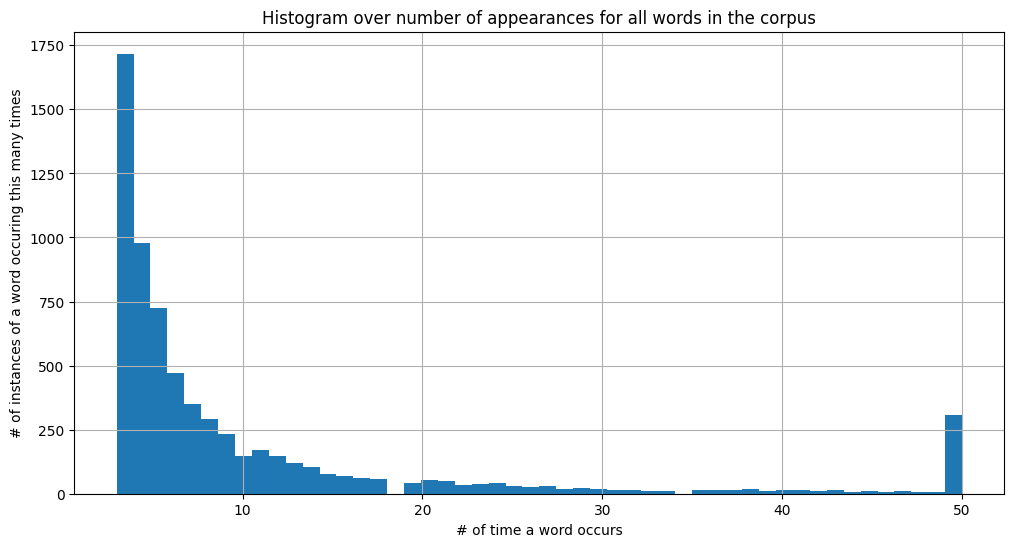

In [ ]:
plt.figure(figsize=(12,6))
s = pd.Series(np.array(count_matrix.sum(axis=0))[0])
s.clip(upper=50).hist(bins=50)
plt.xlabel('# of time a word occurs')
plt.ylabel('# of instances of a word occuring this many times')
plt.title('Histogram over number of appearances for all words in the corpus')
plt.show();

### Let's us look at Apple Inc.

In [ ]:
wiki_df.head(2)

,page_id,page_title,page_views,intro_text
0,856,Apple Inc.,190485,Apple Inc. is an American multinational techno...
1,2386,American Airlines,40829,"American Airlines, Inc. (AA) is a major Americ..."


In [ ]:
n_row = 0  # Apple Inc.
print(wiki_df.iloc[n_row])

page_id                                                     856
page_title                                           Apple Inc.
page_views                                               190485
intro_text    Apple Inc. is an American multinational techno...
Name: 0, dtype: object


In [ ]:
# get number of occurences of ngrams that are not zero
data = []
for idx in count_matrix[n_row].nonzero()[1]:
    n_count = count_matrix[n_row, idx]
    data.append((n_count, vocab[idx]))
print(len(data), 'ngrams found that occur more than 0 times in specified row')
ngram_counts = pd.DataFrame(data, columns=['n_occur', 'token']).sort_values(by='n_occur', ascending=False)
ngram_counts.head(10)

432 ngrams found that occur more than 0 times in specified row


,n_occur,token
26,49,the
14,33,and
0,27,apple
9,16,in
77,13,to
52,12,as
25,11,of
60,10,its
7,8,company
73,8,jobs


### we now have an easy way to count words in a large corpus and access it for specific documents.

### We have found a representation for each document

## But:

### 'the' higher ranked than 'apple'. How do we improve on BOW?

# $ \\ $
# $ \\ $
# $ \\ $

# $ \\ $
# $ \\ $
# $ \\ $

# $ \\ $
# $ \\ $
# $ \\ $

- ### incorporate information on how 'common' a word is in general

##

## Term frequency–inverse document frequency (TF-IDF)

### <span style="color:orange">!This is combines some of the most important concepts of basic NLP!</span>

- $t$: term
- $d$: document
- tf($t$,$d$): term frequency
- idf($t$): inverse document frequency

### $\text{tf-idf}(t,d) = \text{tf}(t,d) * \text{idf}(t)$


### $\text{idf}(t) = \text{log}\frac{1 + n}{1 + \text{df}(t)} + 1$

- $n$: total number of documents in the corpus
- df($t$): number of documents that contain term

### So we get the importance of a word in a document relative to the overall ubiquity of the word across the corpus
### Note that this is good, but arbitrary!

#### many options `norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False`
#### see more here: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html

# $ \\ $
# $ \\ $
# $ \\ $

### Scikit `TfidfVectorizer`

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(

    analyzer='word',
    token_pattern=r'\b[^\s][^\s]+\b',

    lowercase=True,
    stop_words=None,

    ngram_range=(1, 2),

    min_df=3,
    max_df=1.0,

)
count_matrix = vectorizer.fit_transform(wiki_df['intro_text'].tolist());
vocab = list(pd.Series(vectorizer.vocabulary_).sort_values().index)

In [ ]:
n_row = 0  # Apple Inc.
# get number of occurences of ngrams that are not zero
data = []
for idx in count_matrix[n_row].nonzero()[1]:
    n_count = count_matrix[n_row, idx]
    data.append((n_count, vocab[idx]))
print(len(data), 'ngrams found that occur more than 0 times in specified row')
ngram_counts = pd.DataFrame(data, columns=['tfidf_score', 'token']).sort_values(by='tfidf_score', ascending=False)
ngram_counts.head(10)

432 ngrams found that occur more than 0 times in specified row


,tfidf_score,token
431,0.666525,apple
405,0.238718,the
358,0.231418,jobs
417,0.159088,and
413,0.121580,computer
370,0.104154,store
354,0.097173,to
379,0.084922,as
320,0.083683,next
35,0.077744,the world's


## This is much better!

### How about n-grams?

In [ ]:
ngram_counts[ngram_counts['token'].str.contains(' ')]

,tfidf_score,token
35,0.077744,the world's
102,0.063528,as the
164,0.057855,apple inc
129,0.054101,services include
151,0.054101,consumer electronics
...,...,...
10,0.012504,more than
163,0.010421,inc is
156,0.008791,headquartered in
161,0.008074,an american


# $ \\ $
# $ \\ $
# $ \\ $

## Let's do the inverse
## Test - Which companies are these tokens from?

In [ ]:
def get_tf_idf_counts(n_row):
    # get number of occurences of ngrams that are not zero
    data = []
    for idx in count_matrix[n_row].nonzero()[1]:
        n_count = count_matrix[n_row, idx]
        data.append((n_count, vocab[idx]))
    ngram_counts = pd.DataFrame(data, columns=['tfidf_score', 'token']).sort_values(by='tfidf_score', ascending=False)
    return ngram_counts.reset_index(drop=True)

In [ ]:
n_row = 1
ngram_counts = get_tf_idf_counts(n_row)
ngram_counts.head(10)

,tfidf_score,token
0,0.296650,american airlines
1,0.244503,airlines
2,0.202565,passengers
3,0.186475,worth
4,0.186475,airline
5,0.173778,american
6,0.148325,hubs
7,0.143029,scheduled
8,0.138702,destinations
9,0.135044,eagle


# $ \\ $
# $ \\ $
# $ \\ $

# $ \\ $
# $ \\ $
# $ \\ $

### American Airlines!

# $ \\ $
# $ \\ $
# $ \\ $

In [ ]:
n_row = 2
ngram_counts = get_tf_idf_counts(n_row)
ngram_counts.head(10)

,tfidf_score,token
0,0.397743,processors
1,0.319004,amd
2,0.212669,graphics
3,0.193626,embedded
4,0.106335,its manufacturing
5,0.106335,markets while
6,0.106335,supplier and
7,0.106335,multinational semiconductor
8,0.106335,and embedded
9,0.106335,computers and


# $ \\ $
# $ \\ $
# $ \\ $

# $ \\ $
# $ \\ $
# $ \\ $

### Advanced Micro Devices (AMD)!

# $ \\ $
# $ \\ $
# $ \\ $

### We actually created a somewhat efficient word-based 'summary' of our text by counting.
### Let's do another example:

In [ ]:
n_row = 3
ngram_counts = get_tf_idf_counts(n_row)
ngram_counts.head(10)

,tfidf_score,token
0,0.490077,particularly
1,0.319051,music
2,0.306238,still
3,0.179425,form of
4,0.179425,other types
5,0.179425,distinct
6,0.179425,refers
7,0.173019,seen
8,0.173019,church
9,0.167785,specific


In [ ]:
wiki_df.iloc[3]

page_id                                                    2439
page_title                                               Anthem
page_views                                                 2967
intro_text    An anthem is a musical composition of celebrat...
Name: 3, dtype: object

# $ \\ $
# $ \\ $
# $ \\ $

### Using this simple technique we actually found a mistake in our Russell 1k dataset!

### TF-IDF is one of the most useful tools of basic NLP and is used in products everywhere because it is simple, fast and surprisingly powerful!

# $ \\ $
# $ \\ $
# $ \\ $